In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('credit_card.csv')
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
bef = data.shape

In [5]:
cat = ['CUST_ID','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
for i in cat:
    data[i] = data[i].astype('object')

In [6]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                    object
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                  object
ONEOFF_PURCHASES_FREQUENCY           object
PURCHASES_INSTALLMENTS_FREQUENCY     object
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
def column_name(column):
    l = []
    for i in data[column]:
        if i >0.5:
            l.append(1)
        else:
            l.append(0)
    return l

In [8]:
a = column_name('PURCHASES_FREQUENCY')
data['PURCHASES_FREQUENCY'] = pd.DataFrame(a, columns = ['PURCHASES_FREQUENCY'])
b = column_name('BALANCE_FREQUENCY')
data['BALANCE_FREQUENCY'] = pd.DataFrame(a, columns = ['BALANCE_FREQUENCY'])
c = column_name('ONEOFF_PURCHASES_FREQUENCY')
data['ONEOFF_PURCHASES_FREQUENCY'] = pd.DataFrame(c, columns = ['ONEOFF_PURCHASES_FREQUENCY'])
d = column_name('PURCHASES_INSTALLMENTS_FREQUENCY')
data['PURCHASES_INSTALLMENTS_FREQUENCY'] = pd.DataFrame(d, columns = ['PURCHASES_INSTALLMENTS_FREQUENCY'])

In [9]:
cat = ['CUST_ID','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
for i in cat:
    data[i] = data[i].astype('object')

In [10]:
data.describe(include = 'object')

,CUST_ID,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
count,8950,8950,8950,8950,8950
unique,8950,2,2,2,2
top,C14425,0,0,0,0
freq,1,4803,4803,7607,5860


# Q1. What does the primary analysis of several categorical features reveal?

In [11]:
data.describe(include = 'object')

,CUST_ID,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
count,8950,8950,8950,8950,8950
unique,8950,2,2,2,2
top,C14425,0,0,0,0
freq,1,4803,4803,7607,5860


In [12]:
data_cat = data.select_dtypes(include = 'object')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
labels = data_cat.columns

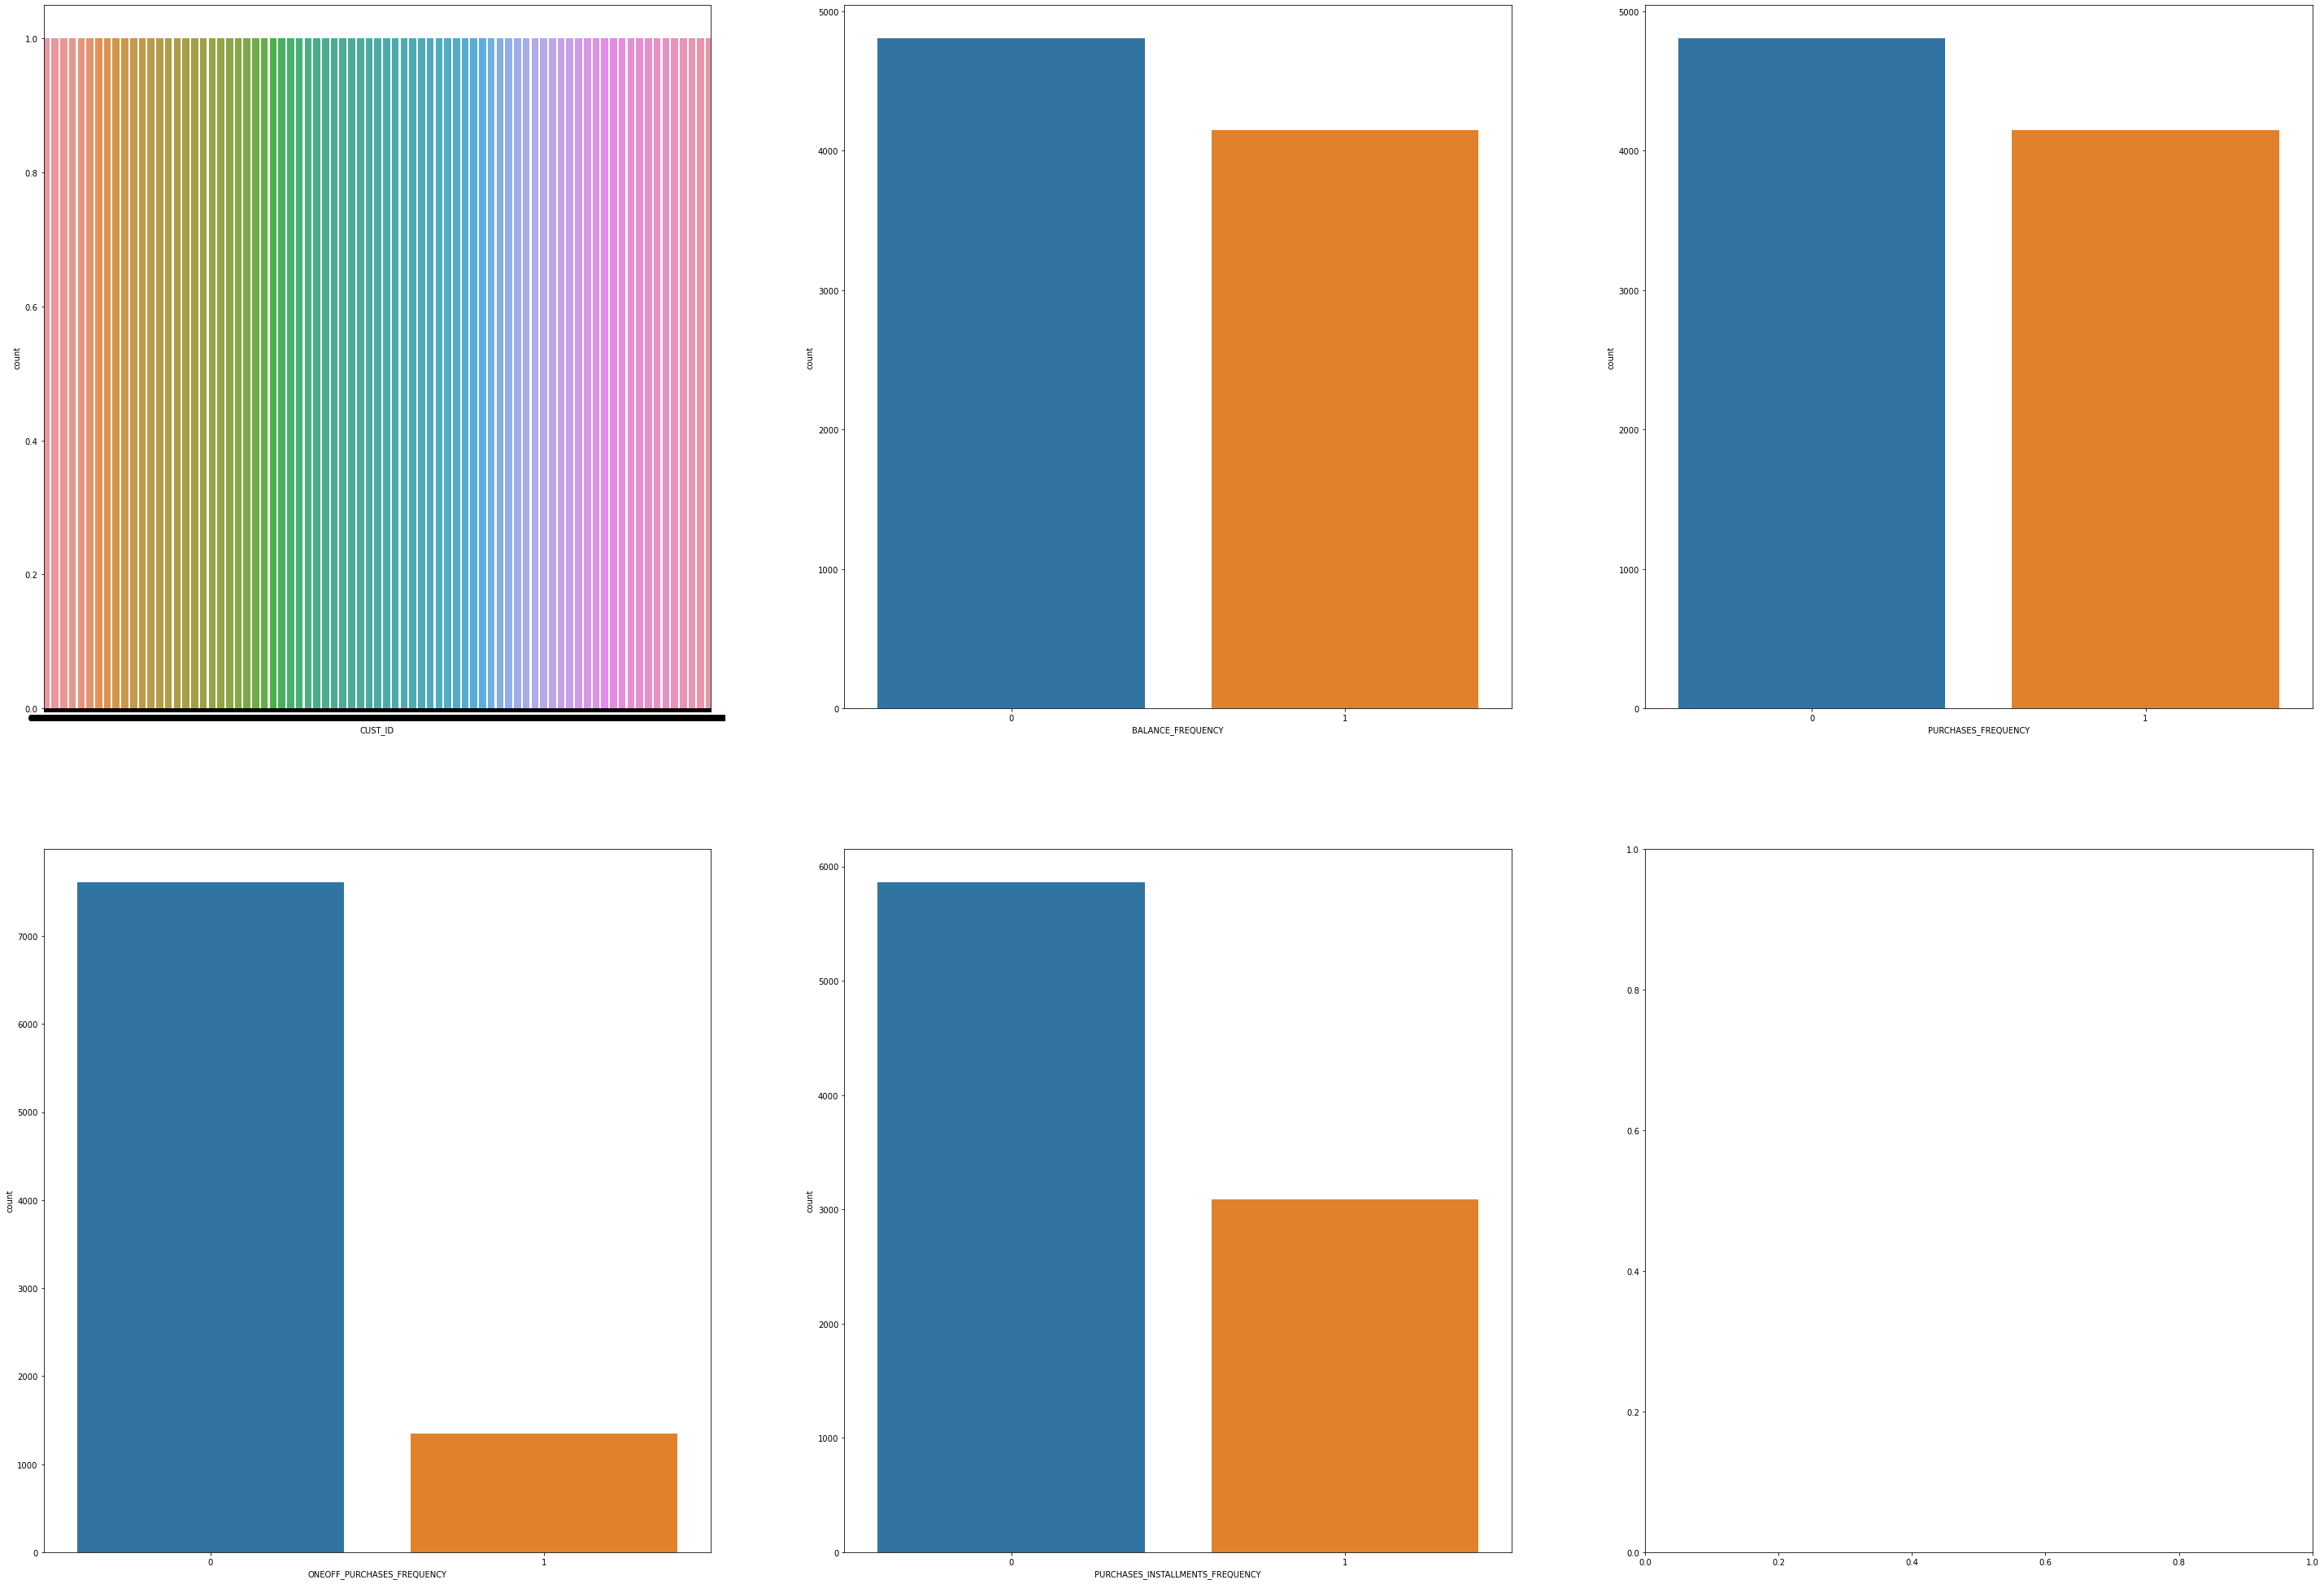

In [15]:
fig, ax = plt.subplots(2, 3, figsize = (50, 35))
for var, subplot in zip(labels, ax.flatten()):
    sns.countplot(data_cat[var], ax = subplot)
plt.show()

In [16]:
def value_counts(column):
    return data_cat[column].value_counts()

In [17]:
value_counts('BALANCE_FREQUENCY')

0    4803
1    4147
Name: BALANCE_FREQUENCY, dtype: int64

In [18]:
value_counts('PURCHASES_FREQUENCY')

0    4803
1    4147
Name: PURCHASES_FREQUENCY, dtype: int64

In [19]:
value_counts('ONEOFF_PURCHASES_FREQUENCY')

0    7607
1    1343
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

In [20]:
value_counts('PURCHASES_INSTALLMENTS_FREQUENCY')

0    5860
1    3090
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

In [21]:
data_cat.head(2)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,C10001,0,0,0,0
1,C10002,0,0,0,0


# Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis
b. Outlier Treatment using the Z-score method
c. Deal with correlated variables

a. Missing Value Analysis

In [22]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [24]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

In [25]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

b. Outlier Treatment using the Z-score method

In [26]:
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0,95.4,0.0,95.4,0.000000,0,0,0,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0,0.0,0.0,0.0,6442.945483,0,0,0,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [27]:
data['BALANCE']

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64

In [28]:
data.head(1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0,95.4,0.0,95.4,0.0,0,0,0,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


In [29]:
data['BALANCE']

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64

In [30]:
data_num = data.select_dtypes(include = np.number)
data_num.columns

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [31]:
def z_score(column):
    l = []
    mean = np.mean(data[column])
    std = np.std(data[column])
    for i in data[column]:
        l.append((i - mean)/std)
    return l

In [32]:
a = z_score('BALANCE')
data['BALANCE_z_score']  = pd.DataFrame(a, columns = ['BALANCE_z_score'])

b = z_score('PURCHASES')
data['PURCHASES_z_score'] = pd.DataFrame(b, columns = ['PURCHASES_z_score'])

c = z_score('INSTALLMENTS_PURCHASES')
data['INSTALLMENTS_PURCHASES_z_score'] = pd.DataFrame(c, columns = ['INSTALLMENTS_PURCHASES_z_score'])

d = z_score('CASH_ADVANCE')
data['CASH_ADVANCE_z_score'] = pd.DataFrame(d, columns = ['CASH_ADVANCE_z_score'])

e = z_score('CASH_ADVANCE_FREQUENCY')
data['CASH_ADVANCE_FREQUENCY_z_score'] = pd.DataFrame(e, columns = ['CASH_ADVANCE_FREQUENCY_z_score'])

f = z_score('CASH_ADVANCE_TRX')
data['CASH_ADVANCE_TRX_z_score'] = pd.DataFrame(f, columns = ['CASH_ADVANCE_TRX_z_score'])


g = z_score('PURCHASES_TRX')
data['PURCHASES_TRX_z_score'] = pd.DataFrame(g, columns = ['PURCHASES_TRX_z_score'])


h = z_score('CREDIT_LIMIT')
data['CREDIT_LIMIT_z_score'] = pd.DataFrame(h, columns = ['CREDIT_LIMIT_z_score'])

i = z_score('PAYMENTS')
data['PAYMENTS_z_score'] = pd.DataFrame(i, columns = ['PAYMENTS_z_score'])

j = z_score('PRC_FULL_PAYMENT')
data['PRC_FULL_PAYMENT_z_score'] = pd.DataFrame(j, columns = ['PRC_FULL_PAYMENT_z_score'])

k = z_score('TENURE')
data['TENURE_z_score'] = pd.DataFrame(k, columns = ['TENURE_z_score'])


In [33]:
data = data[(data['BALANCE_z_score'] > -3) & (data['BALANCE_z_score'] <3)]
data = data[(data['PURCHASES_z_score'] > -3) & (data['PURCHASES_z_score'] <3)]
data = data[(data['INSTALLMENTS_PURCHASES_z_score'] >-3) & (data['INSTALLMENTS_PURCHASES_z_score'] <3)]
data = data[(data['CASH_ADVANCE_z_score'] >-3) & (data['CASH_ADVANCE_z_score'] <3)]
data = data[(data['CASH_ADVANCE_FREQUENCY_z_score'] >-3) & (data['CASH_ADVANCE_FREQUENCY_z_score'] <3)]
data = data[(data['CASH_ADVANCE_TRX_z_score'] >-3) & (data['CASH_ADVANCE_TRX_z_score'] <3)]
data = data[(data['PURCHASES_TRX_z_score'] >-3) & (data['PURCHASES_TRX_z_score'] <3)]
data = data[(data['CREDIT_LIMIT_z_score'] >-3) & (data['CREDIT_LIMIT_z_score'] <3)]
data = data[(data['PAYMENTS_z_score'] >-3) & (data['PAYMENTS_z_score'] <3)]
data = data[(data['PRC_FULL_PAYMENT_z_score'] >-3) & (data['PRC_FULL_PAYMENT_z_score'] <3)]
data = data[(data['TENURE_z_score'] >-3) & (data['TENURE_z_score'] <3)]

In [34]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'BALANCE_z_score',
       'PURCHASES_z_score', 'INSTALLMENTS_PURCHASES_z_score',
       'CASH_ADVANCE_z_score', 'CASH_ADVANCE_FREQUENCY_z_score',
       'CASH_ADVANCE_TRX_z_score', 'PURCHASES_TRX_z_score',
       'CREDIT_LIMIT_z_score', 'PAYMENTS_z_score', 'PRC_FULL_PAYMENT_z_score',
       'TENURE_z_score'],
      dtype='object')

In [35]:
data = data.drop(['BALANCE_z_score',
       'PURCHASES_z_score', 'INSTALLMENTS_PURCHASES_z_score',
       'CASH_ADVANCE_z_score', 'CASH_ADVANCE_FREQUENCY_z_score',
       'CASH_ADVANCE_TRX_z_score', 'PURCHASES_TRX_z_score',
       'CREDIT_LIMIT_z_score', 'PAYMENTS_z_score', 'PRC_FULL_PAYMENT_z_score',
       'TENURE_z_score'], axis = 1)

In [36]:
aft = data.shape

In [37]:
import operator
missing_rows_columns = tuple(map(operator.sub,bef,aft))
missing_rows_columns

(1266, 0)

c. Deal with correlated variables

In [38]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0,95.40,0.00,95.40,0.000000,0,0,0,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0,0.00,0.00,0.00,6442.945483,0,0,0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1,773.17,773.17,0.00,0.000000,1,1,0,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0,1499.00,1499.00,0.00,205.788017,0,0,0,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,0,16.00,16.00,0.00,0.000000,0,0,0,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,C19118,55.147722,1,163.31,0.00,163.31,0.000000,1,0,1,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,8
8878,C19119,869.328293,0,0.00,0.00,0.00,1153.925205,0,0,0,0.125000,3,0,1200.0,150.755024,337.986933,0.000000,8
8879,C19120,137.744895,1,441.00,0.00,441.00,0.000000,1,0,1,0.000000,0,6,1000.0,169.249683,124.639905,0.000000,8
8880,C19121,331.070135,0,81.20,81.20,0.00,419.341394,0,0,0,0.250000,7,1,500.0,116.761487,205.065526,0.000000,8


c. Deal with correlated variables

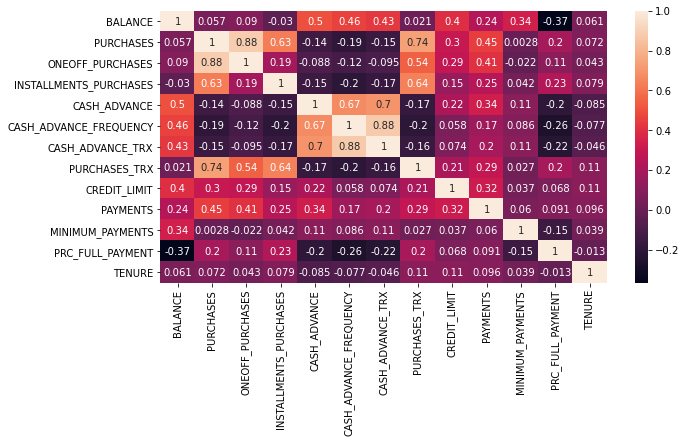

In [45]:
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(data.corr(), annot= True)

In [39]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrices = dataset.corr()
    for i in range(len(corr_matrices.columns)):
        for j in range(i):
            if (corr_matrices.iloc[i,j]) > threshold:
                col_names = corr_matrices.columns[i]
                col_corr.append(col_names)
    return col_corr

In [40]:
l = correlation(data, 0.5)

In [41]:
from collections import Counter
d = Counter(l)
correlated_columns = d.keys()

In [42]:
correlated_columns

dict_keys(['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX'])

In [43]:
data = data.drop(data[correlated_columns], axis = 1)

In [44]:
data.shape

(7684, 12)

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [45]:
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0,95.4,0,0,0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0,0.0,0,0,0,7000.0,4103.032597,1072.340217,0.222222,12


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
data = data.drop(['CUST_ID'], axis = 1)

In [48]:
scaler.fit(data)

StandardScaler()

In [49]:
scaled_data = scaler.transform(data)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(scaled_data)

PCA(n_components=4)

In [60]:
x_pca = pca.transform(scaled_data)

In [51]:
pca.n_components_

4

<function matplotlib.pyplot.show(*args, **kw)>

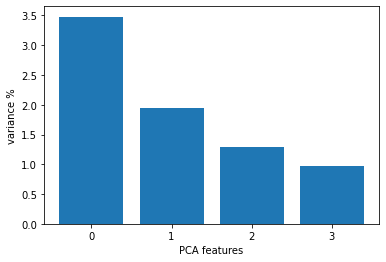

In [58]:
feature = range(pca.n_components_)
plt.bar(feature,pca.explained_variance_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(feature)
plt.show

In [57]:
pca.explained_variance_

array([3.47947423, 1.9525279 , 1.29422475, 0.97479982])

# Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [64]:
from sklearn.cluster import KMeans
cluster_count = 10
error = []
for i in range(1,cluster_count +1):
    kmeans_cluster_sel = KMeans(n_clusters= i , random_state= 1)
    kmeans_cluster_sel = kmeans_cluster_sel.fit(scaled_data)
    error.append(kmeans_cluster_sel.inertia_)

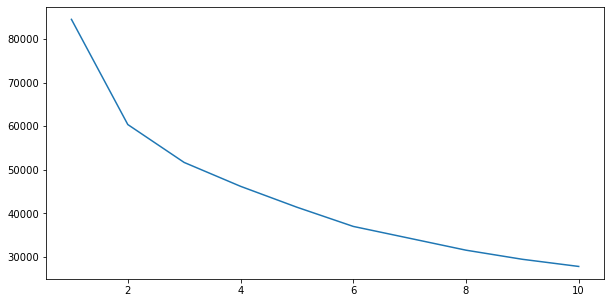

In [65]:
plt.plot(np.arange(1,11), error)

# Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [67]:
from sklearn.metrics import silhouette_score
clusters = [2,4,5,6, 8,10]
l = []
for i in clusters:
    clust = KMeans(n_clusters=i,random_state= 1)
    predict = clust.fit_predict(scaled_data)
    score = silhouette_score(scaled_data,predict,random_state= 1)
    l.append(score)
    

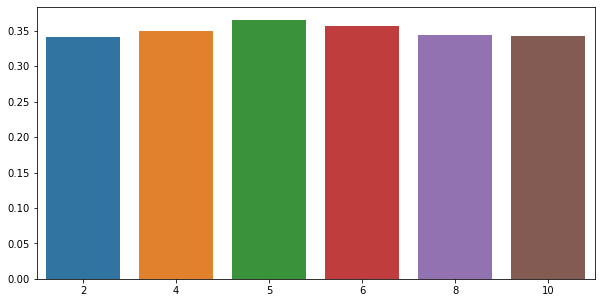

In [68]:
sns.barplot(clusters, l )

    5 is getting high. We should do 5 clusters

# Q.6 Build a K-means clustering model using the optimum value of K.

In [70]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0,95.40,0,0,0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0,0.00,0,0,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1,773.17,1,1,0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0,1499.00,0,0,0,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,0,16.00,0,0,0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...
8877,55.147722,1,163.31,1,0,1,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0,0.00,0,0,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1,441.00,1,0,1,1000.0,169.249683,124.639905,0.000000,8
8880,331.070135,0,81.20,0,0,0,500.0,116.761487,205.065526,0.000000,8


In [71]:
from sklearn.cluster import KMeans

In [72]:
k_means_model = KMeans(n_clusters = 5,random_state= 1)
k_means_model = k_means_model.fit(scaled_data)

In [73]:
y_predict = k_means_model.predict(scaled_data)

In [74]:
a = k_means_model.labels_

In [75]:
from collections import Counter
d = Counter(a)
d

Counter({0: 3223, 2: 767, 3: 1050, 1: 2177, 4: 467})

In [76]:
data_1 = data.copy()

In [77]:
col = data_1.columns

In [78]:
centers = pd.DataFrame(k_means_model.cluster_centers_, columns= col)

In [79]:
centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.244414,-0.910065,-0.463740,-0.910065,-0.391894,-0.707038,-0.307062,-0.269320,-0.139439,-0.211675,0.251961
1,-0.328731,1.098823,0.155711,1.098823,-0.391894,1.153198,-0.163893,-0.156373,-0.074893,0.279280,0.207217
2,1.999143,-0.598386,-0.263787,-0.598386,-0.376542,-0.463645,1.136666,0.846257,1.035967,-0.454462,0.199517
3,0.086972,1.093083,1.439517,1.093083,2.411542,0.218292,0.636986,0.695165,-0.099088,0.405219,0.215098
4,-0.259674,-0.316432,-0.328730,-0.316432,-0.272132,-0.225523,-0.415849,-0.365229,-0.167218,-0.005723,-3.516194


cluster analysis

In [80]:
speak('cluster analysis')
speak('making cluster - 1')

cluster - 0

In [81]:
col = centers.columns
cen = list(centers.iloc[0,0:])

In [82]:
col = pd.DataFrame(col, columns= ['columns'])
cen = pd.DataFrame(cen, columns = ['center'])

In [83]:
cluster_1 = pd.concat([col,cen], axis =1).sort_values(by = 'center', ascending= False )[0:20]

In [84]:
cluster_1

,columns,center
10,TENURE,0.251961
8,MINIMUM_PAYMENTS,-0.139439
9,PRC_FULL_PAYMENT,-0.211675
0,BALANCE,-0.244414
7,PAYMENTS,-0.269320
6,CREDIT_LIMIT,-0.307062
4,ONEOFF_PURCHASES_FREQUENCY,-0.391894
2,PURCHASES,-0.463740
5,PURCHASES_INSTALLMENTS_FREQUENCY,-0.707038
1,BALANCE_FREQUENCY,-0.910065


cluster - 1

In [85]:
speak('creating cluster - 2')


In [86]:
col = centers.columns
cen = list(centers.iloc[1,0:])
col = pd.DataFrame(col, columns= ['columns'])
cen = pd.DataFrame(cen, columns = ['center'])
cluster_2 = pd.concat([col,cen], axis =1).sort_values(by = 'center', ascending= False )[0:20]

In [87]:
cluster_2

,columns,center
5,PURCHASES_INSTALLMENTS_FREQUENCY,1.153198
1,BALANCE_FREQUENCY,1.098823
3,PURCHASES_FREQUENCY,1.098823
9,PRC_FULL_PAYMENT,0.279280
10,TENURE,0.207217
2,PURCHASES,0.155711
8,MINIMUM_PAYMENTS,-0.074893
7,PAYMENTS,-0.156373
6,CREDIT_LIMIT,-0.163893
0,BALANCE,-0.328731


cluster - 2

In [88]:
speak('creating cluster - 3')

In [89]:
col = centers.columns
cen = list(centers.iloc[2,0:])
col = pd.DataFrame(col, columns= ['columns'])
cen = pd.DataFrame(cen, columns = ['center'])
cluster_2 = pd.concat([col,cen], axis =1).sort_values(by = 'center', ascending= False )[0:20]
cluster_2

,columns,center
0,BALANCE,1.999143
6,CREDIT_LIMIT,1.136666
8,MINIMUM_PAYMENTS,1.035967
7,PAYMENTS,0.846257
10,TENURE,0.199517
2,PURCHASES,-0.263787
4,ONEOFF_PURCHASES_FREQUENCY,-0.376542
9,PRC_FULL_PAYMENT,-0.454462
5,PURCHASES_INSTALLMENTS_FREQUENCY,-0.463645
1,BALANCE_FREQUENCY,-0.598386


cluster - 3

In [90]:
speak('creating cluster - 4')

In [91]:
col = centers.columns
cen = list(centers.iloc[3,0:])
col = pd.DataFrame(col, columns= ['columns'])
cen = pd.DataFrame(cen, columns = ['center'])
cluster_2 = pd.concat([col,cen], axis =1).sort_values(by = 'center', ascending= False )[0:20]
cluster_2

,columns,center
4,ONEOFF_PURCHASES_FREQUENCY,2.411542
2,PURCHASES,1.439517
1,BALANCE_FREQUENCY,1.093083
3,PURCHASES_FREQUENCY,1.093083
7,PAYMENTS,0.695165
6,CREDIT_LIMIT,0.636986
9,PRC_FULL_PAYMENT,0.405219
5,PURCHASES_INSTALLMENTS_FREQUENCY,0.218292
10,TENURE,0.215098
0,BALANCE,0.086972


In [92]:
speak('creating cluster - 5')

cluster - 4

In [93]:
col = centers.columns
cen = list(centers.iloc[4,0:])
col = pd.DataFrame(col, columns= ['columns'])
cen = pd.DataFrame(cen, columns = ['center'])
cluster_2 = pd.concat([col,cen], axis =1).sort_values(by = 'center', ascending= False )[0:20]
cluster_2

,columns,center
9,PRC_FULL_PAYMENT,-0.005723
8,MINIMUM_PAYMENTS,-0.167218
5,PURCHASES_INSTALLMENTS_FREQUENCY,-0.225523
0,BALANCE,-0.259674
4,ONEOFF_PURCHASES_FREQUENCY,-0.272132
1,BALANCE_FREQUENCY,-0.316432
3,PURCHASES_FREQUENCY,-0.316432
2,PURCHASES,-0.328730
7,PAYMENTS,-0.365229
6,CREDIT_LIMIT,-0.415849


# Part III: Time Series

In [110]:
import pandas as pd

In [111]:
data = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

# Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [112]:
data['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [113]:
grp = data[['month','priceMod']].groupby('month')
data_1 = grp.agg({'priceMod':'sum'})
data_1

,priceMod
month,
April,475911
August,1053034
December,976913
February,764080
January,916269
July,764721
June,602993
March,526783
May,483464


# Q2. Build time series model and check the performance of the model using RMSE

In [114]:
data.head(3)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,Jan-05
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,Jan-06
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,Jan-10


In [115]:
def month_converter(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
    return months.index(month) + 1

In [116]:
l = []
for i in data['month']:
    a = month_converter(i)
    l.append(a)

In [117]:
data['month'] = pd.DataFrame(l, columns = ['month'])

In [123]:
data.dtypes

market      object
month        int64
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [105]:
len(data['month'])

10227

In [106]:
l = []
for i in range(len(data['month'])):
    l.append('-')

In [107]:
data['-'] = pd.DataFrame(l)


In [108]:
data.head(5)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,-
0,ABOHAR(PB),1,2005,2350,404,493,446,PB,ABOHAR,Jan-05,-
1,ABOHAR(PB),1,2006,900,487,638,563,PB,ABOHAR,Jan-06,-
2,ABOHAR(PB),1,2010,790,1283,1592,1460,PB,ABOHAR,Jan-10,-
3,ABOHAR(PB),1,2011,245,3067,3750,3433,PB,ABOHAR,Jan-11,-
4,ABOHAR(PB),1,2012,1035,523,686,605,PB,ABOHAR,Jan-12,-


In [136]:
m = [str(i) for i in data['month']]
data['month'] = pd.DataFrame(m, columns = ['month'])

In [137]:
y = [str(i) for i in data['year']]
data['year'] = pd.DataFrame(y, columns = ['year'])

In [140]:
data['month']+ data['-']+ data['year']

KeyError: '-'

In [134]:
data['dates'] = pd.concat([data['month'],data['-'],data['year']], axis = 1)

KeyError: '-'

In [94]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,-
0,ABOHAR(PB),1,2005,2350,404,493,446,PB,ABOHAR,1,-
1,ABOHAR(PB),1,2006,900,487,638,563,PB,ABOHAR,1,-
2,ABOHAR(PB),1,2010,790,1283,1592,1460,PB,ABOHAR,1,-
3,ABOHAR(PB),1,2011,245,3067,3750,3433,PB,ABOHAR,1,-
4,ABOHAR(PB),1,2012,1035,523,686,605,PB,ABOHAR,1,-
...,...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),12,2011,131326,282,612,526,MS,YEOLA,12,-
10223,YEOLA(MS),12,2012,207066,485,1327,1136,MS,YEOLA,12,-
10224,YEOLA(MS),12,2013,215883,472,1427,1177,MS,YEOLA,12,-
10225,YEOLA(MS),12,2014,201077,446,1654,1456,MS,YEOLA,12,-


In [47]:
pd.to_datetime(data[['month','year']],format='%m%Y')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

In [45]:
data[(data['month'] == 'January') & (data['year'] == 2005)]

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,Jan-05
90,AGRA(UP),January,2005,6400,329,424,377,UP,AGRA,Jan-05
223,AHMEDABAD(GUJ),January,2005,41880,242,416,332,GUJ,AHMEDABAD,Jan-05
350,AHMEDNAGAR(MS),January,2005,58100,96,438,266,MS,AHMEDNAGAR,Jan-05
584,AMRITSAR(PB),January,2005,7200,397,450,424,PB,AMRITSAR,Jan-05
...,...,...,...,...,...,...,...,...,...,...
9586,SURAT(GUJ),January,2005,39770,263,400,331,GUJ,SURAT,Jan-05
9731,TRIVENDRUM,January,2005,5820,640,791,717,KEL,TRIVENDRUM,Jan-05
9860,UJJAIN(MP),January,2005,2399,77,348,242,MP,UJJAIN,Jan-05
9986,VARANASI(UP),January,2005,42400,416,451,434,UP,VARANASI,Jan-05


In [40]:
data['date'].unique()

array(['Jan-05', 'Jan-06', 'Jan-10', 'Jan-11', 'Jan-12', 'Jan-13',
       'Jan-14', 'Jan-15', 'Feb-05', 'Feb-06', 'Feb-10', 'Feb-11',
       'Feb-12', 'Feb-13', 'Feb-14', 'Feb-15', 'Mar-05', 'Mar-06',
       'Mar-10', 'Mar-11', 'Mar-12', 'Mar-13', 'Mar-14', 'Mar-15',
       'Apr-06', 'Apr-10', 'Apr-11', 'Apr-12', 'Apr-13', 'Apr-14',
       'May-05', 'May-06', 'May-10', 'May-11', 'May-12', 'May-13',
       'May-14', 'May-15', 'Jun-05', 'Jun-06', 'Jun-07', 'Jun-10',
       'Jun-11', 'Jun-12', 'Jun-13', 'Jun-14', 'Jun-15', 'Jul-05',
       'Jul-07', 'Jul-10', 'Jul-11', 'Jul-12', 'Jul-13', 'Jul-14',
       'Jul-15', 'Aug-05', 'Aug-07', 'Aug-10', 'Aug-11', 'Aug-12',
       'Aug-13', 'Aug-14', 'Sep-05', 'Sep-06', 'Sep-10', 'Sep-11',
       'Sep-12', 'Sep-13', 'Sep-14', 'Oct-05', 'Oct-09', 'Oct-10',
       'Oct-11', 'Oct-12', 'Oct-13', 'Oct-14', 'Nov-05', 'Nov-09',
       'Nov-10', 'Nov-11', 'Nov-12', 'Nov-13', 'Nov-14', 'Dec-05',
       'Dec-09', 'Dec-10', 'Dec-11', 'Dec-12', 'Dec-13', 'Dec-

# SEEING PATTERNS

In [8]:
grp = data.groupby('month')
month = grp.agg({'priceMod':'mean'})


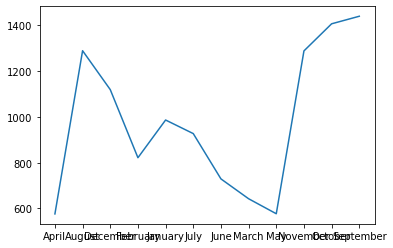

In [10]:
import matplotlib.pyplot as plt
plt.plot(month)

In [11]:
grp = data.groupby('year')
year = grp.agg({'priceMod':'mean'})

In [12]:
rollmean = year.rolling(window=12).mean()
rollstd = year.rolling(window=12).std()
print(rollmean, rollstd)

         priceMod
year             
1996          NaN
1997          NaN
1998          NaN
1999          NaN
2000          NaN
2001          NaN
2002          NaN
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007   479.540395
2008   500.506748
2009   551.686807
2010   562.250551
2011   606.982884
2012   640.041140
2013   779.870276
2014   859.742029
2015   992.940658
2016  1042.338372         priceMod
year            
1996         NaN
1997         NaN
1998         NaN
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007  218.288759
2008  213.452791
2009  242.567297
2010  264.553442
2011  280.998137
2012  262.615258
2013  480.569247
2014  480.124712
2015  564.533458
2016  539.539676


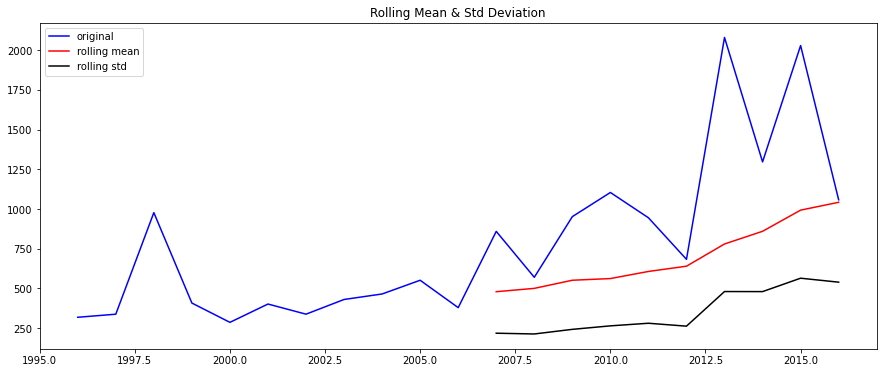

In [13]:
plt.figure(figsize=(15,6))
orig = plt.plot(year, color='blue', label='original' )
mean = plt.plot(rollmean, color='red', label='rolling mean' )
std = plt.plot(rollstd, color='black', label='rolling std' )
plt.legend()
plt.title('Rolling Mean & Std Deviation')
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
print('Result :')
dftest = adfuller(data['priceMod'], autolag = 'AIC')
dftest

Result :


(-12.074950171280166,
 2.3016425006561e-22,
 38,
 10188,
 {'1%': -3.4309920247732566,
  '5%': -2.8618237373353677,
  '10%': -2.5669210282407273},
 161883.9651860099)

In [28]:
year

,priceMod
year,
1996,318.583333
1997,337.914286
1998,977.339623
1999,408.145161
2000,286.612903
2001,401.920635
2002,338.125000
2003,430.568966
2004,465.215238


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(year)

plt.plot(year, label = 'Original')
plt.legend()

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend()

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend()

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

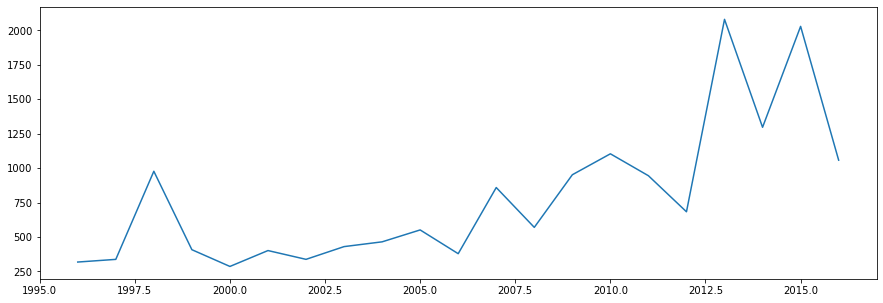

In [86]:
plt.plot(year)

In [169]:
def month_converter(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
    return months.index(month) + 1

In [174]:
l = []
for i in data['month']:
    a = month_converter(i)
    l.append(a)

In [176]:
data['month'] = pd.DataFrame(l, columns = ['month'])

In [157]:
month_converter('Jan')

1

In [96]:
data['day'] = data['date'].str.split('-').str[1]
data.tail(3)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,day
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,Dec-13,13
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,Dec-14,14
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,Dec-15,15


In [112]:
data['year'].unique()

array([2005, 2006, 2010, 2011, 2012, 2013, 2014, 2015, 2007, 2009, 2008,
       2016, 2002, 2004, 2003, 2001, 1999, 2000, 1998, 1996, 1997],
      dtype=int64)

In [127]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
data[data['year'] == 2001]

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,day
439,AHMEDNAGAR(MS),September,2001,20272,110,522,346,MS,AHMEDNAGAR,Sep-01,01
452,AHMEDNAGAR(MS),October,2001,32081,105,615,367,MS,AHMEDNAGAR,Oct-01,01
465,AHMEDNAGAR(MS),November,2001,13375,125,773,488,MS,AHMEDNAGAR,Nov-01,01
478,AHMEDNAGAR(MS),December,2001,51874,150,508,348,MS,AHMEDNAGAR,Dec-01,01
1204,BHAVNAGAR(GUJ),December,2001,2624,353,510,431,GUJ,BHAVNAGAR,Dec-01,01
1579,CHAKAN(MS),January,2001,76267,239,562,441,MS,CHAKAN,Jan-01,01
1593,CHAKAN(MS),February,2001,179955,276,393,347,MS,CHAKAN,Feb-01,01
1605,CHAKAN(MS),March,2001,87460,256,352,311,MS,CHAKAN,Mar-01,01
1617,CHAKAN(MS),April,2001,2730,160,290,253,MS,CHAKAN,Apr-01,01
1630,CHAKAN(MS),May,2001,6700,153,275,237,MS,CHAKAN,May-01,01
